In [20]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [21]:
# Define constants exmple 6.2 from book sutton and barto chapter 6 (Random Walk)
# A Markov reward process, or MRP, is a Markov decision process without actions.

# We will often use MRPs when focusing on the prediction problem, in which there 
# is no need to distinguish the dynamics due to the environment from those due to 
# the agent. In this MRP, all episodes start in the center state, C, then proceed 
# either left or right by one state on each step, with equal probability.

GO_LEFT = 0
GO_RIGHT = 1

# Given The true values of all the states, A through E, are 1/6,2/6,3/6,4/6,and 5/6.
# create true value function
TRUE_VALUES = np.arange(6) / 6.0
TRUE_VALUES = np.append(TRUE_VALUES, 1)

# Given in all cases the approximate value function was initialized to the intermediate 
# value V (s) = 0.5, for all s. 
# create value value function
V = np.zeros(6)
V[1:6] = 0.5
V = np.append(V, 1)

print('True Values: {}'.format(TRUE_VALUES))
print('Current Values: {}'.format(V))

True Values: [0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
Current Values: [0.  0.5 0.5 0.5 0.5 0.5 1. ]


In [22]:
def prediction(method, current_values, alpha=0.1, batch_updating=False):
    # all episode start from the state C
    current_state = 3
    process = [current_state]
    
    if method=='TD':
        process_rewards = [0]
        while True:
            # sampling based on binomial distribution
            # https://docs.scipy.org/doc/numpy/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial
            # sample next action
            action = np.random.binomial(n=1, p=0.5)
            if action == GO_LEFT:
                next_state = current_state - 1
            else:
                next_state = current_state + 1

            # as complete return is not calculated in TD 
            # we can assume all rewards are 0
            immediate_reward = 0

            # update values if not batch updating
            if not batch_updating:
                td_err = immediate_reward + current_values[next_state] - current_values[current_state]
                current_values[current_state] += alpha * td_err

            process.append(next_state)
            if next_state == 0 or next_state == 6:
                break

            process_rewards.append(immediate_reward)
            current_state = next_state
        return process, process_rewards
    else:
        while True:
            action = np.random.binomial(n=1, p=0.5)
            if action==GO_LEFT:
                next_state = current_state - 1
            else:
                next_state = current_state + 1
            process.append(next_state)
            
            # returns are 0 and 1 if agent ends up in 
            # left and right terminal states respectively
            if next_state == 6:
                returns = 1.0
                break
            if next_state == 0:
                returns == 0.0
                break
            current_state = next_state
        # get returns for each intermediate state
        t_returns = [returns] * (len(process) - 1)
        if not batch_updating:
            for state in process[:-1]:
                error = returns - current_values[state]
                current_values[state] += alpha * error
        return process, t_returns

In [23]:
# plot values learned after various numbers of episodes on a single run of TD(0)
def plot_state_values():
    episodes = [0, 1, 10, 100]

    plt.figure(1)
    current_values = np.copy(V)
    for i in range(101):
        if i in episodes:
            # plot graph
            plt.plot(current_values, label=str(i))
        prediction('TD', current_values)
    plt.plot(TRUE_VALUES, label='true values')
    plt.xlabel('State')
    plt.ylabel('Estimated State Values')
    plt.legend(loc="upper left")

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


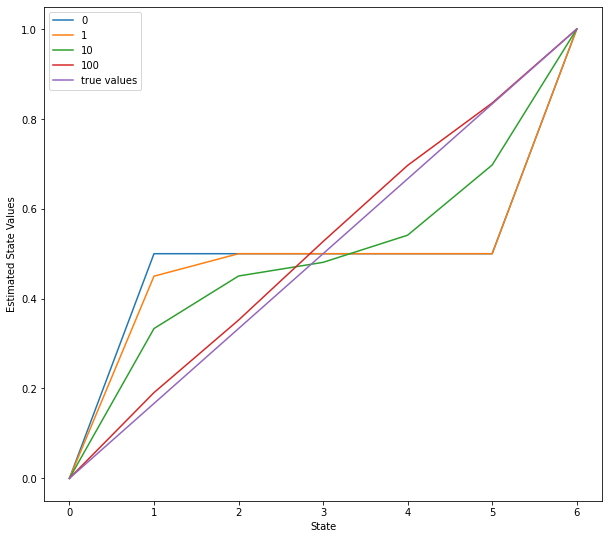

In [25]:
plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
plot_state_values()
plt.show()

In [19]:
def get_rms_error():
    # define alpha values as defined in the example
    mc_alpha = [0.01, 0.02, 0.03, 0.04]
    td_alpha = [0.05, 0.1, 0.15]
    
    # max_iterations
    max_iterations = 100
    
    # total episodes
    episodes = 101
    
    all_alphas = mc_alpha + td_alpha
    
    for i, alpha in enumerate(all_alphas):
        all_errors = np.zeros(episodes)
        if i < len(mc_alpha):
            method = 'MC'
            plotstyle = 'dashdot'
        else:
            method='TD'
            plotstyle='solid'
        for iteration in range(max_iterations):
            current_values = np.copy(V)
            errors = list()
            for eps in range(episodes):
                rms = np.sqrt(np.sum(np.power(TRUE_VALUES - current_values, 2)) / 5.0)
                errors.append(rms)
                if method=='MC':
                    prediction(method, current_values, alpha=alpha)
                else:
                    prediction(method, current_values, alpha=alpha)
            all_errors.append(np.asarray(errors))
        all_errors /= max_iterations
        plt.plot(all_errors, linestyle=plotstyle, label=method + ', alpha = %.02f' % (alpha))
    plt.xlabel('episodes')
    plt.ylabel('RMS')
    plt.legend()